In [8]:
VECTORS = 'w2v_weighted'

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import pandas as pd
import config

In [10]:
final_df = pd.read_csv(config.final_df)
final_df[VECTORS] = final_df[VECTORS].apply(lambda x:eval(x))

In [4]:
agg_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
clustering = agg_clustering.fit_predict([text for text in final_df[final_df[VECTORS].notna()][VECTORS].values])

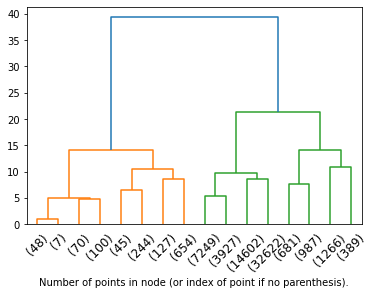

In [5]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model_cl = agg_clustering

model_cl = model_cl.fit([text for text in final_df[final_df[VECTORS].notna()][VECTORS].values])
# plot the top three levels of the dendrogram
plot_dendrogram(model_cl, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=45)
plt.show()

In [11]:
agg_clustering_2 = AgglomerativeClustering(n_clusters=15)
clustering_2 = agg_clustering_2.fit_predict([text for text in final_df[final_df[VECTORS].notna()][VECTORS].values])

In [12]:
silhouette_score([text for text in final_df[final_df[VECTORS].notna()][VECTORS].values], agg_clustering_2.labels_)

-0.03445645714663848